# Loan Eligibility Prediction 💰 using Machine Learning Models

# Introduction

In this notebook , I'm going to predict customers are eligible for the loan and check whether what are the missing criteria to know why customer not getting loan to make there own house.

# The Problem is,

In a Simple Term, Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.
I will use the training set to build  model, and the test set to validate it. 

First of all, we need to import the necessary packages to work with the data to solve our problem

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats

# 1. Gathering data

In [2]:
df=pd.read_csv("D:\DataScience\Machine Learning Projects\Loan_dataset.csv")

Here, I show the first five rows from datasets

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset Key Information.

Loan_ID--------------> Unique Loan ID.
Gender --------------> Male/ Female
Married --------------> Applicant married (Y/N)
Dependents ------------> Number of dependents
Education -------------> Applicant Education (Graduate/ Under Graduate)
Self_Employed ---------> Self-employed (Y/N)
ApplicantIncome -------> Applicant income
CoapplicantIncome -----> Coapplicant income
LoanAmount -----------> Loan amount in thousands
Loan_Amount_Term ------> Term of a loan in months
Credit_History --------> Credit history meets guidelines
Property_Area ---------> Urban/ Semi-Urban/ Rural
Loan_Status -----------> Loan approved (Y/N)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the output.

1. There are `614` entries
- There are total 13 features (0 to 12)
- There are three types of datatype `dtypes: float64(4), int64(1), object(8)`
- It's Memory usage that is, `memory usage: 62.5+ KB`
- Also, We can check how many missing values available in the `Non-Null Count` column

In [5]:
df.shape

(614, 13)

There are 614 rows and 13 columns in dataset

# Understanding the data

*  First of all I use the df.describe() method to shows the important information from the dataset
*  It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### As I said the above cell, this the information of all the methamatical details from dataset. Like `count`, `mean`, `standard deviation (std)`, `min`, `quartiles(25%, 50%, 75%)` and `max`.

# Exploratory Data Analysis

 list of how many values are missing

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Handle missing values

In [9]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
mean1 = df['Dependents'].mean()
df['Dependents'].fillna(mean1, inplace=True)

In [10]:
mean2 = df['Credit_History'].mean()
df['Credit_History'].fillna(mean2, inplace=True)

In [11]:
mean3 = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(mean3, inplace=True)

In [12]:
mean4 = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean4, inplace=True)

Drop rows with any remaining null values

In [13]:
df.dropna(inplace=True)

# 3. Data Visualizations

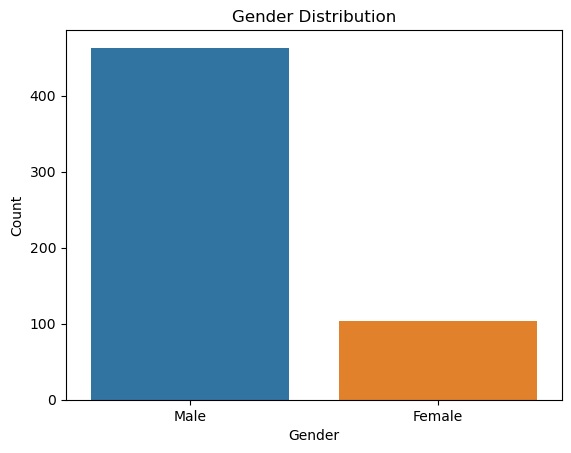

In [14]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From above graph, I can say there are higher number of males compared to females in the dataset

In [15]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 81.80%
Percentage of Female applicant: 18.20%
Missing values percentage: 0.00%


👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

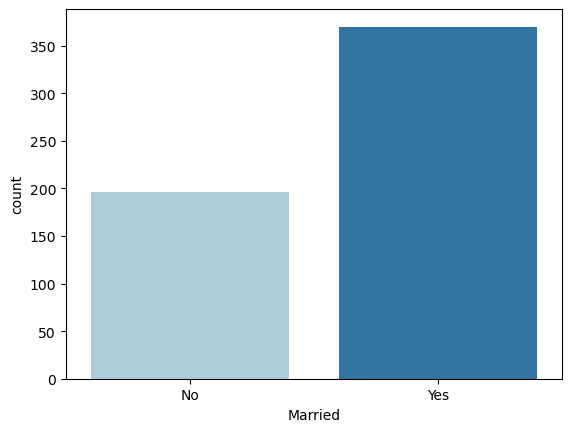

In [16]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

From above graph, I can say there are more number of married people compared to unmarried in the dataset

In [17]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 65.37%
Percentage of Not married applicant: 34.63%
Missing values percentage: 0.00%


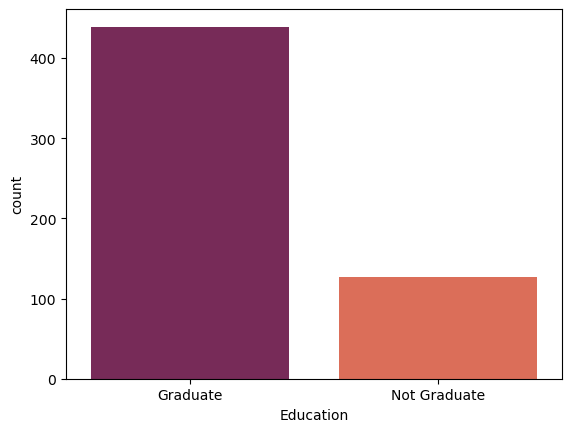

In [18]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

From above graph, I can say there are more number of graduate people compared to non-graduate in the dataset

In [19]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 77.56%
Percentage of Not graduate applicant: 22.44%
Missing values percentage: 0.00%


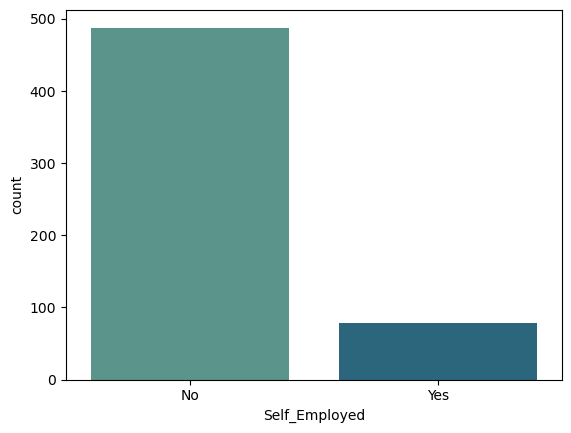

In [20]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

From above graph, I can say there are less self employed people in the dataset

In [21]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 86.22%
Percentage of self employed: 13.78%
Missing values percentage: 0.00%


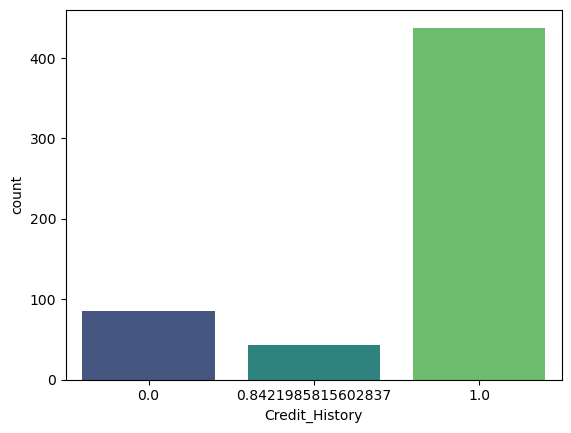

In [22]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

There are more good credit people in dataset

In [23]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.39%
Percentage of Bad credit history: 15.02%
Missing values percentage: 0.00%


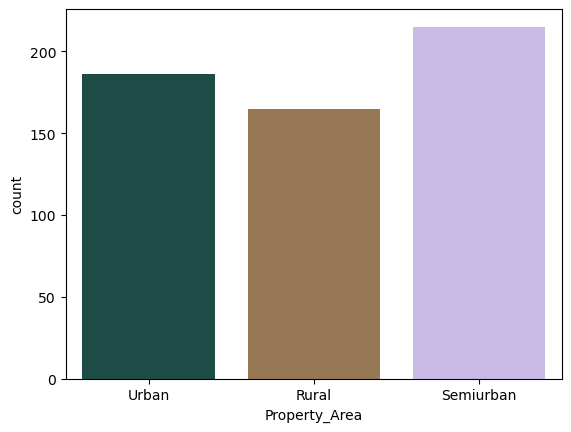

In [24]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

From above graph, I can say there are more people from semiurban area followed by urabn area.And less people from rural area

In [25]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.86%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.99%
Missing values percentage: 0.00%


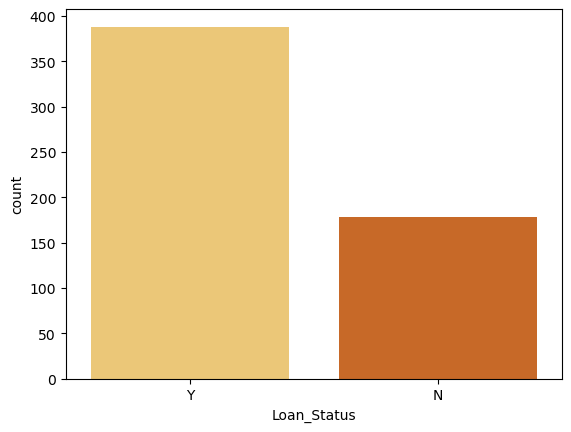

In [26]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In dataset most of the prople are eligible for loan

In [27]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.55%
Percentage of Rejected: 31.45%
Missing values percentage: 0.00%


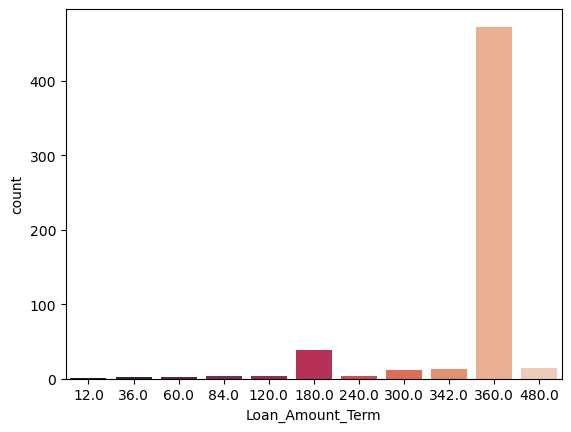

In [28]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

From above graph, I can say many people have loan term of 360 months

In [29]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.18%
Percentage of 36: 0.35%
Percentage of 60: 0.35%
Percentage of 84: 0.71%
Percentage of 120: 0.53%
Percentage of 180: 6.89%
Percentage of 240: 0.53%
Percentage of 300: 2.12%
Percentage of 360: 83.57%
Percentage of 480: 2.47%
Missing values percentage: 0.00%


In [30]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,566.000000,566.000000,566.000000
mean,5259.971731,1579.146502,144.541066
std,5412.901682,2507.243865,80.420869
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3839.500000,1149.000000,128.000000
75%,5811.250000,2297.250000,165.000000
max,81000.000000,33837.000000,650.000000


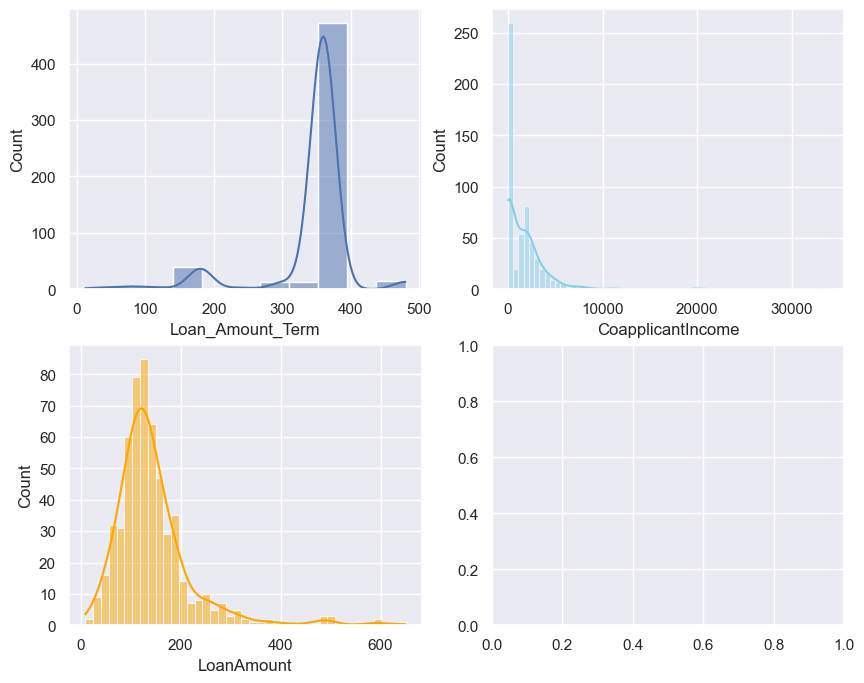

In [31]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df,x='Loan_Amount_Term',kde=True,ax=axs[0,0])
# sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

1. Top left plot(Loan_Amount_Term): This histogram shows the distribution of Loan_Amount_Term(represent in months).
    The majority of loan therms concentrated between 300 and 400 months
    
2. top Right plot(CoapplicantIncome): This histogram shows distribution of CoapplicantIncome. Most values are concentrated near zero.
It indicates that many loan applications might have little to no coapplicant income

3.Bottom left (LoanAmount):This histogram shows the distribution of LoanAmount. 

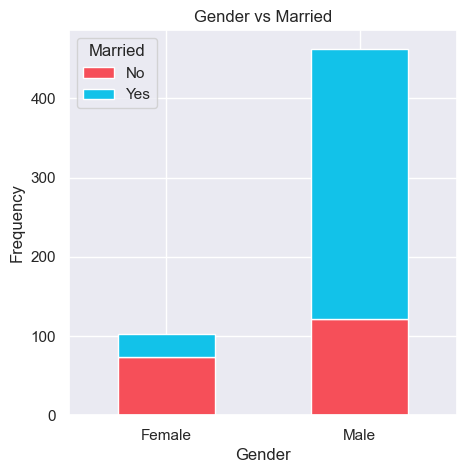

In [32]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency') #no. of applicants
plt.xticks(rotation=0)
plt.show()

- Analysis: The plot indicates that there are more male applicants than female appllcants and among male applicnats, a higher proportion are married compared to female applicants
- skyblue-married
- red-unmarried
- 0-Female
- 1-Male

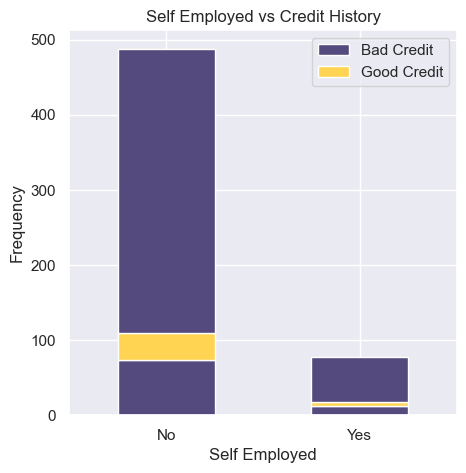

In [33]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

#### Analysis: 
- There is large number of applicants who are not self employed.Among them, a majority have bad credit(blue).A smaller portion have good credit.
- There are fewer self-employed applicants comapred to those who are not self-employed. Among the self-employed, the majority also have bad credit.

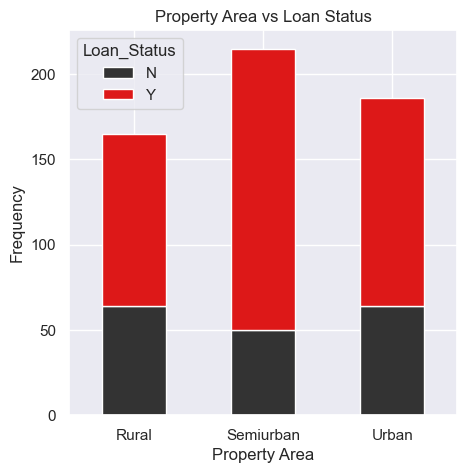

In [34]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

- x-axis:Property area
- y-axis: No. of loan applications
#### Analysis:
- For rural areas, there are fewer total loan apllications as compared to semiurban and urban areas.The majority of the loans in rural areas were approved.
- For semiurban areas, there are more applications and majority of these loans were approved.
- For urban areas, there is highest no. of loan applications.While a considerable number of loans were approved, a larger number of applications were not also approved as compared to other two ares.

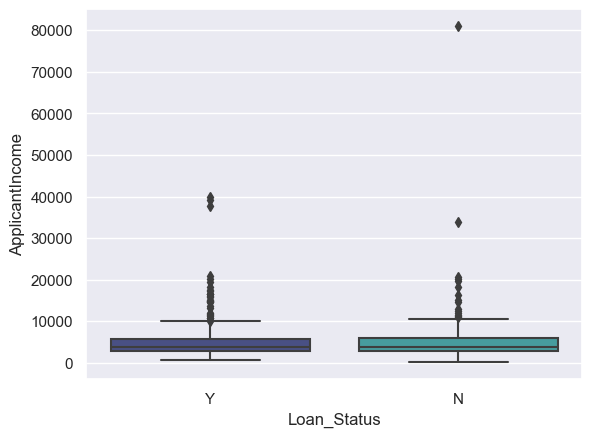

In [35]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

#### Analysis:
- The median income for applicants with approved loans(Y) apperas to be slightly higher than those with not approved loans(N)
- Both groups have a similar spread in income, but the range of income for not approved loans(N) seems slightly more varid, indicated by more outliers
- There are more outliers in both groups which shows that some applicants have exceptionally high income compared to rest

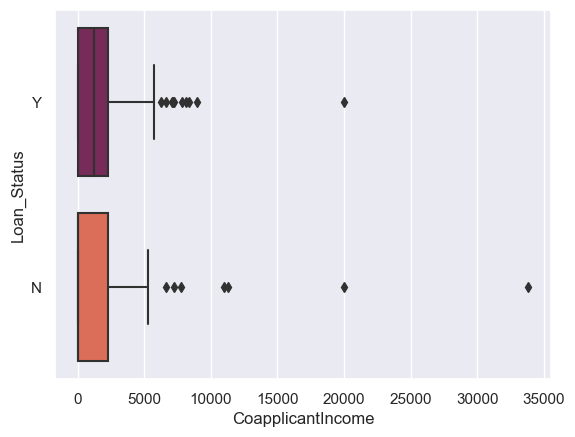

In [36]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

#### Analysis:
- The median coapplicant income for both approved(Y) and not approved(N) loans appears to be close to 0. It shows that many loan applicants do not have a co-applicant, or the co-applicants income is very low.
- Both group have a similar spread in co-applicant income
- There are more outliers in both groups which shows that some Coapplicants have exceptionally high income compared to rest

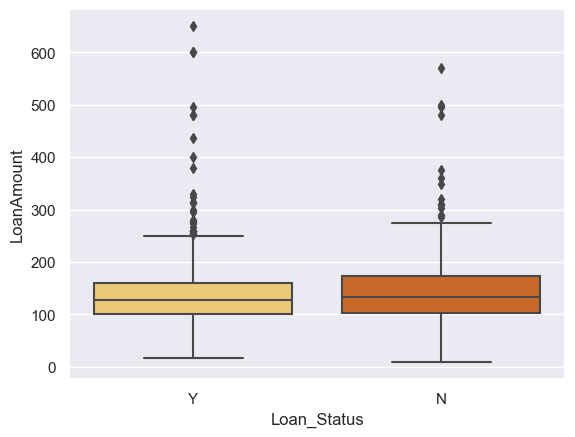

In [37]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

#### Analysis:
- The median loan amount for approved loans(Y) is lower than the median for not approved loans(N)
- There are more outliers in te not approved loans(N) category and wider variation in loan amount

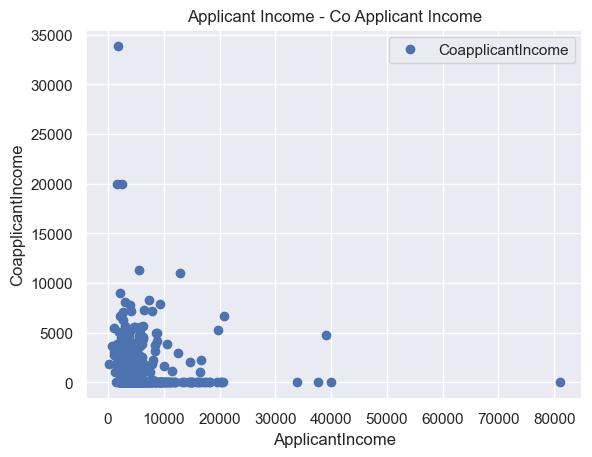

Pearson correlation: -0.10329544969094406
T Test and P value: 
 TtestResult(statistic=14.679632719773453, pvalue=8.761908514686309e-45, df=1130.0)


In [38]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

#### Analysis
- The weak negative correlation means that there is no strong linear relationship between applicant income and coapplicant income
- Most data points are clustered in the lower income ranges for both applicants and coapplicnts. Indicates that loans are often applied by individuals with relatively lower income

In [39]:
# Remove outliers using IQR method 
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [40]:
# Define columns for outlier detection
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [41]:
# Remove outliers using defined function
df = remove_outliers_iqr(df, columns)


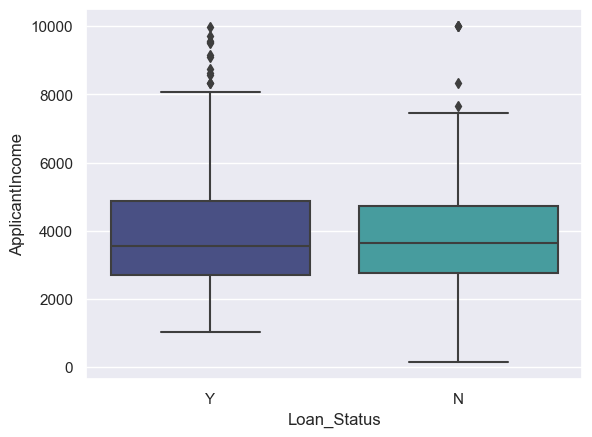

In [42]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

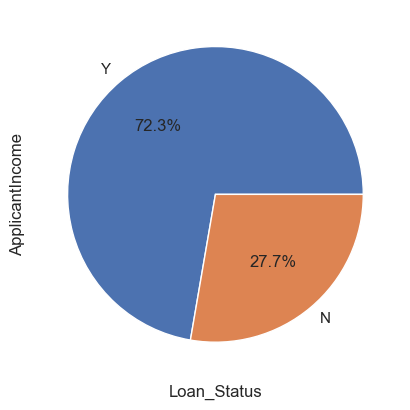

In [43]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");temp = df['Loan_Status'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

Here we have an imbalanced dataset. We will have to balance it before training any model on this data.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_21892\3747836988.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


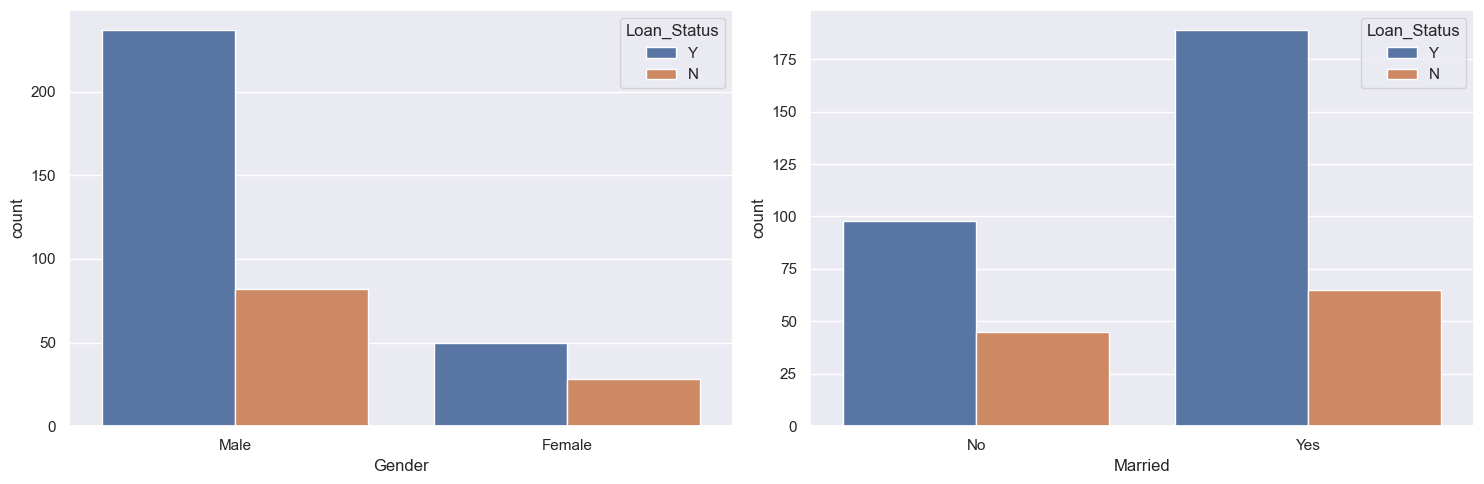

In [44]:
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(['Gender', 'Married']): 
	plt.subplot(1, 2, i+1) 
	sns.countplot(data=df, x=col, hue='Loan_Status') 
plt.tight_layout() 
plt.show() 


#### Analysis:
###### Gender:
- Male applicants have a higher loan applications compared to female applicants
- Both male and female applicants have higher number of approved loans compared to not approved loans

###### Marital status:
- Married applicants have a much higher number of approved loans compared to not approved loans.
- Not married applicants have a relatively lower number of approved loans compared to not approved loans

- The plots suggest that being married may positively influence loan approval.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_21892\2818034900.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_21892\2818034900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_21892\2818034900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

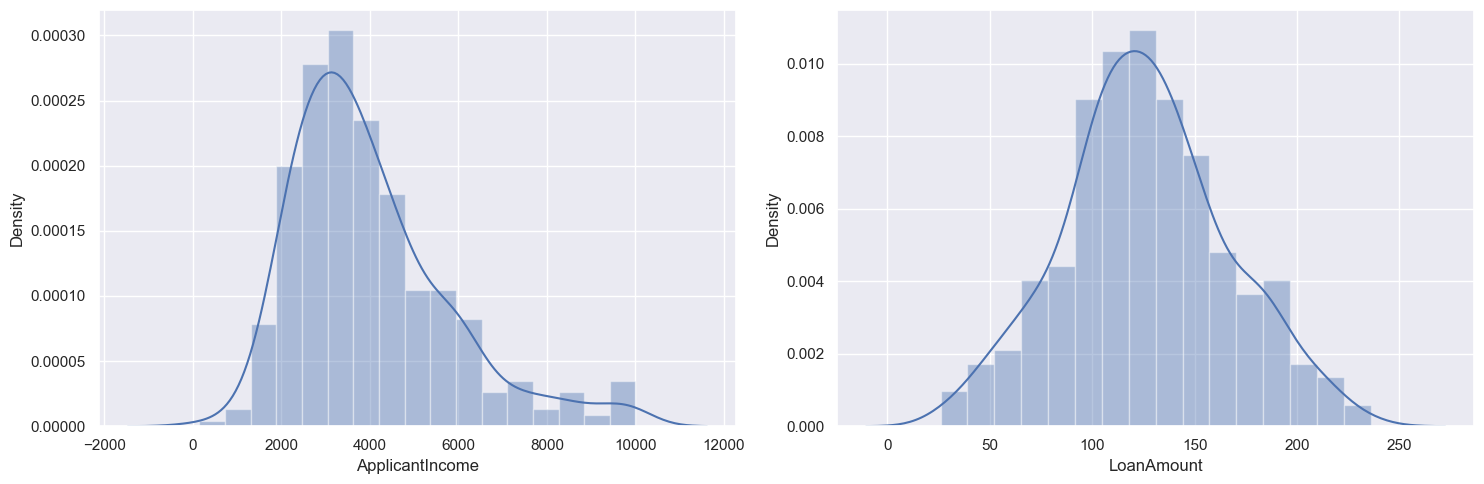

In [45]:
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']): 
	plt.subplot(1, 2, i+1) 
	sns.distplot(df[col]) 
plt.tight_layout() 
plt.show() 


#### Analysis:
###### Left Density plot:
- Thw plot visualizes thee distribution of applicants income in the dataset.
- The plot indicates that most applicants have lower incomes, with fewer applicants having high income

###### Right Density plot:
- Thw plot visualizes thee distribution of loan amounts.
- The distribution seems to be more centralized around a particular range of loan amounts. indicates that most loans are of sililar size.

To find out the outliers in the columns, we can use boxplot.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_21892\3644609352.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


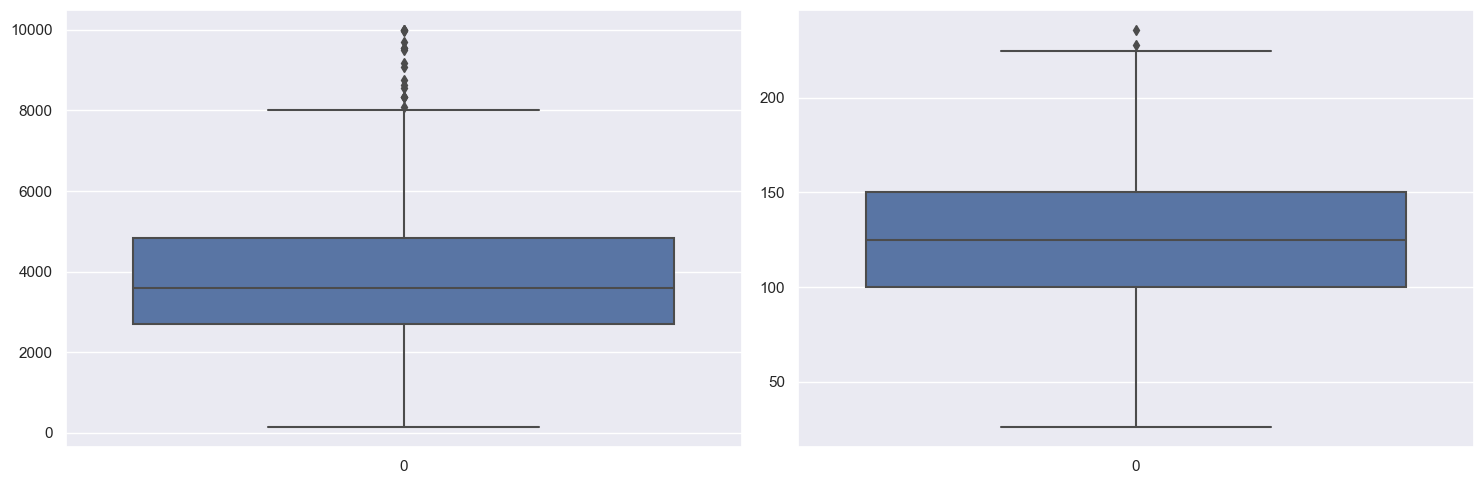

In [46]:
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']): 
	plt.subplot(1, 2, i+1) 
	sns.boxplot(df[col]) 
plt.tight_layout() 
plt.show() 


Perform one hot encoding

df = pd.get_dummies(df)

df

# Drop specified columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

df

# Rename columns
new = {
    'Gender_Male': 'Gender', 
    'Married_Yes': 'Married', 
    'Education_Graduate': 'Education', 
    'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}
df.rename(columns=new, inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Function to apply label encoding 
def encode_labels(data): 
    for col in data.columns: 
        if data[col].dtype == 'object': 
            le = LabelEncoder() 
            data[col] = le.fit_transform(data[col]) 
  
    return data 
  
# Applying function in whole column 
df = encode_labels(df) 


In [48]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,392,1,1,2.0,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
608,393,1,1,0.0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
609,394,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
612,395,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Let’s see the mean amount of the loan granted to males as well as females. For that, I will use groupyby() method.

In [49]:
df.groupby('Gender').mean()['LoanAmount']

Gender
0    111.074671
1    129.670126
Name: LoanAmount, dtype: float64

In [50]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount'] 


Married  Gender
0        0         106.389720
         1         120.053433
1        0         123.000000
         1         133.276386
Name: LoanAmount, dtype: float64

Here is one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried. This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

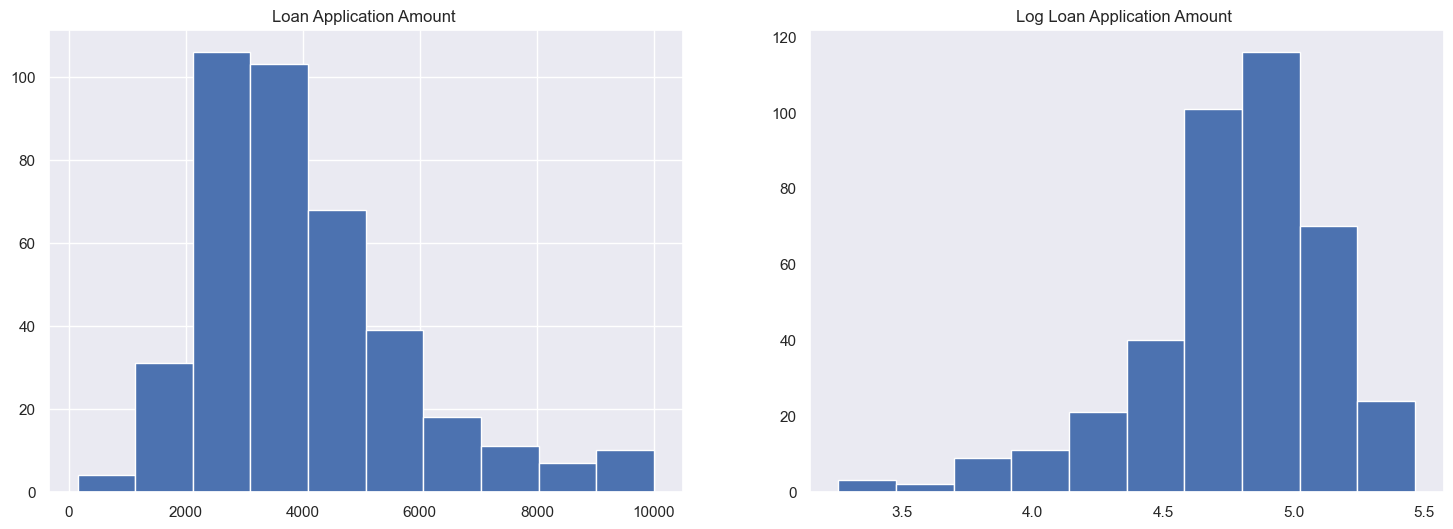

In [51]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

#### Analysis:
###### Left histogram:
- X-axis: Loan application amount
- Y-axis: Frequency
- The plot shows the distribution of loan amounts in the dataset. It indicates how many applicants applied for different ranges of loan amounts. The x-axis represents the loan amounts, and the y-axis represents the number of applicants for each loanamount range.
- Most applicants applied for loans in lower amount range

###### Right histogram
- X-axis: Log loan application amount
- Y-axis: Frequency
- The plot shows the distribution of logarithm of loan application amount. Applying the logarithm transformation helps to normalize data that is skewed.
- The distribution here appears more normalized compared to the left histogram, showing a more balanced spread of loan amounts on a logarithmic scale.

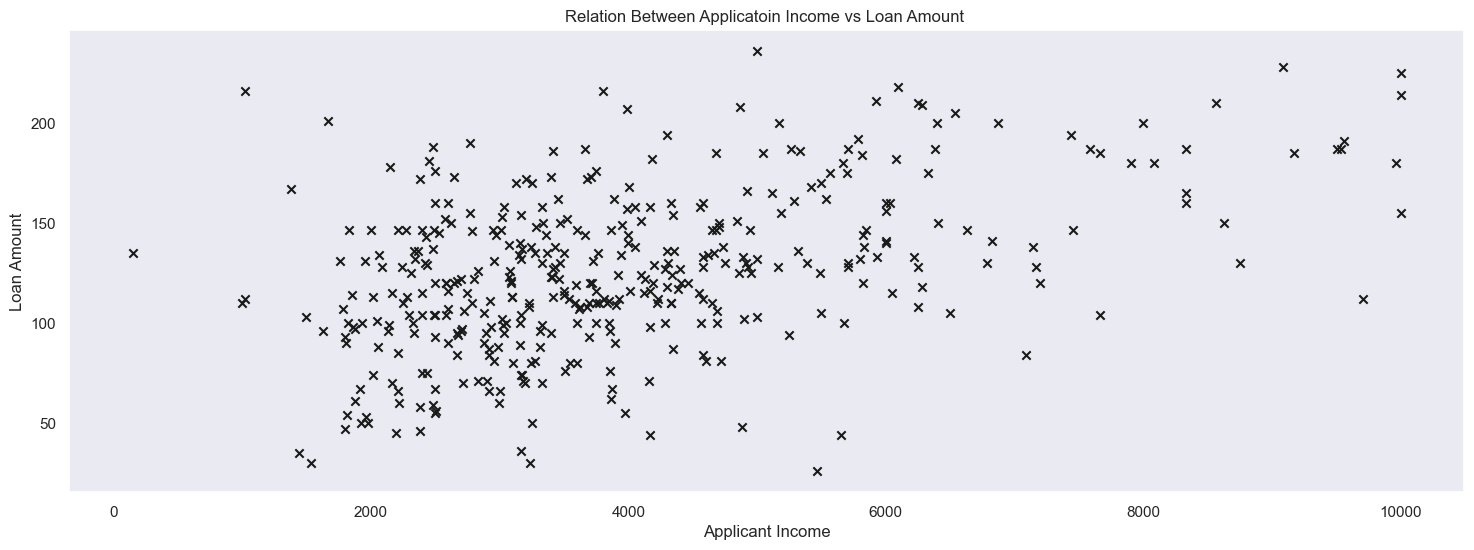

In [52]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

#### Analysis:
- There is a wide range of loan amounts applied by applicants with various incomes.
- The data points appear somewhat spread out, indicates there may not be very strong linear relationship between applicant income nad loan amount
- Most applicant with lower incomes apply for smaller loan amounts and the income increases , the loan amount tend to vary more widely

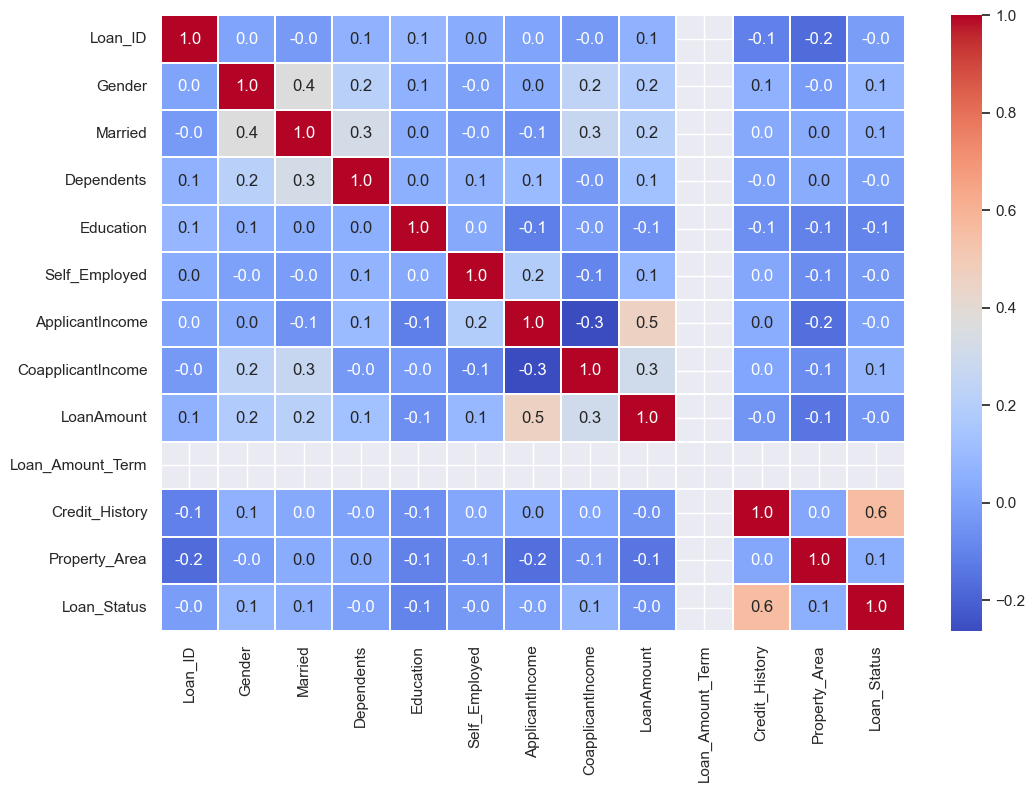

In [53]:
#Generating heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

- In this heatmap, we can clearly seen the relation between two variables
- The color intensity indiactes the strength of correlation, red represents positive and blue represnts negative correlation

In [55]:
df.to_csv("D:\DataScience\Machine Learning Projects\Loan_eda.csv")